In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
data_heart = pd.read_csv('heart.csv')

In [3]:
#afficher la description de la base heart
data_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data_heart.HeartDisease

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [6]:
data_heart.shape

(918, 12)

In [7]:
data_heart.HeartDisease.shape

(918,)

In [8]:
data_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
data_heart.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [10]:
print(data_heart.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


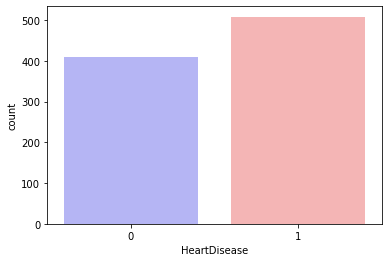

In [11]:
import seaborn as sns
sns.countplot(x="HeartDisease", data=data_heart, palette="bwr")
plt.show()

In [12]:
countNoDisease = len(data_heart[data_heart.HeartDisease == 0])
countHaveDisease = len(data_heart[data_heart.HeartDisease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data_heart.HeartDisease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data_heart.HeartDisease))*100)))

Percentage of Patients Haven't Heart Disease: 44.66%
Percentage of Patients Have Heart Disease: 55.34%


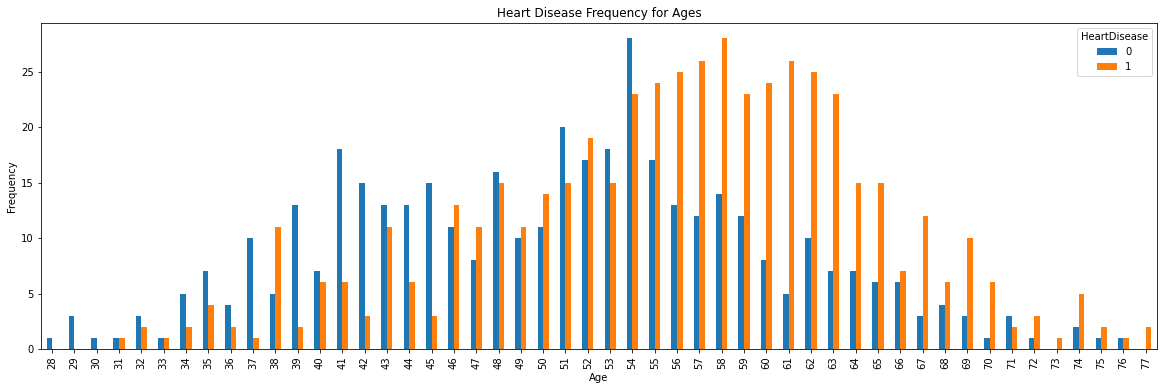

In [13]:
pd.crosstab(data_heart.Age,data_heart.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

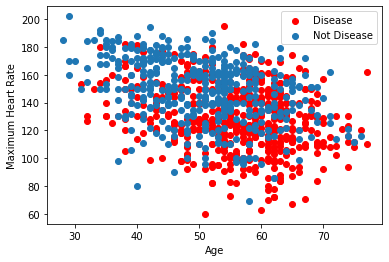

In [14]:
plt.scatter(x=data_heart.Age[data_heart.HeartDisease==1], y=data_heart.MaxHR[(data_heart.HeartDisease==1)], c="red")
plt.scatter(x=data_heart.Age[data_heart.HeartDisease==0], y=data_heart.MaxHR[(data_heart.HeartDisease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [15]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data_heart['Sex']=label_encoder.fit_transform(data_heart['Sex'])
data_heart['ChestPainType']=label_encoder.fit_transform(data_heart['ChestPainType'])
data_heart['RestingECG']=label_encoder.fit_transform(data_heart['RestingECG'])
data_heart['ExerciseAngina']=label_encoder.fit_transform(data_heart['ExerciseAngina'])
data_heart['ST_Slope']=label_encoder.fit_transform(data_heart['ST_Slope'])
data_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


<AxesSubplot:>

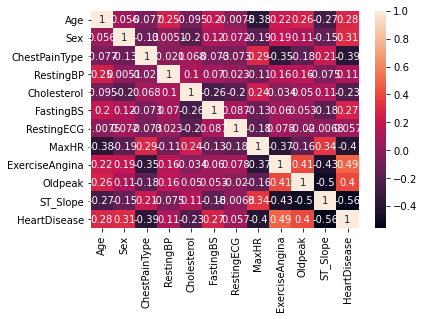

In [16]:
sns.heatmap(data_heart.corr(),annot=True)

In [17]:
data_heart["ChestPainType"].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [18]:
data_heart["ST_Slope"].value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

In [19]:
data_heart.drop(data_heart[data_heart.ST_Slope==0].index,inplace=True)
data_heart["ST_Slope"].value_counts()

1    460
2    395
Name: ST_Slope, dtype: int64

In [20]:
x = data_heart.drop('HeartDisease',axis=1).values
y = data_heart['HeartDisease'].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
Y_pred = classifier.predict(x_test)

In [25]:
print('Train Score',classifier.score(x_train,y_train))
print('Test Score', classifier.score(x_test,y_test))

Train Score 0.8533541341653667
Test Score 0.8925233644859814


In [26]:
from sklearn.neighbors import KNeighborsClassifier
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn=knn.predict(x_test)
print('Train Score',knn.score(x_train,y_train))
print('Test Score', knn.score(x_test,y_test))

Train Score 0.8970358814352574
Test Score 0.8925233644859814


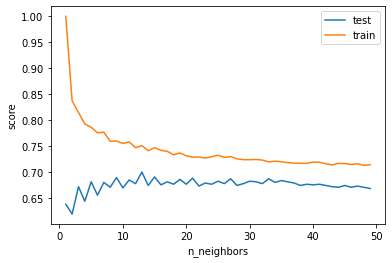

In [30]:
from sklearn.model_selection import validation_curve
k=np.arange(1,50)
train_score,test_score=validation_curve(knn,x,y,param_name='n_neighbors',param_range=k,cv=4)
plt.plot(k,test_score.mean(axis=1),label='test')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [31]:
col_names=list(data_heart.columns)
predictors=col_names[0:9]
target=col_names[11]
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_heart,test_size=0.3,random_state=0)
from sklearn.tree import DecisionTreeClassifier as DS
model=DS(criterion='gini')
#model=DS(criterion='entropy')
model.fit(train[predictors],train[target])
train_pred=model.predict(train[predictors])
test_pred=model.predict(test[predictors])
train_acc=np.mean(train_pred==train[target])
test_acc=np.mean(test_pred==test[target])
print(train_acc)
print(test_acc)

1.0
0.8015564202334631
